In [0]:
import numpy as np 
import pandas as pd 
import io
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

In [0]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re
from bs4 import BeautifulSoup
#TQDM is a progress bar library with good support for nested loops and Jupyter/IPython notebooks.
from tqdm import tqdm

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
from google.colab import files 
import io
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train = train.drop(['Unnamed: 0'], axis=1)

In [7]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [8]:
from google.colab import files 
import io
uploaded = files.upload()

Saving test.csv to test.csv


In [9]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test = test.drop(['Unnamed: 0'], axis=1)
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [0]:
def preprocessing(df):
    reviews = []

    for sent in df['Phrase'].values:

        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
    
        #lemmatize each word to its lemma
        lemma_words = ' '.join(lemmatizer.lemmatize(i) for i in words)
    
        reviews.append(lemma_words)

    return(reviews)

In [43]:
#cleaned reviews for both train and test set retrieved
train_sentences = preprocessing(train)
test_sentences = preprocessing(test)
print(len(train_sentences))
print(len(test_sentences))

156060
66292


In [40]:
print(train_sentences[:10])
print(test_sentences[:10])

['a series of escapade demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amount to much of a story', 'a series of escapade demonstrating the adage that what is good for the goose', 'a series', 'a', 'series', 'of escapade demonstrating the adage that what is good for the goose', 'of', 'escapade demonstrating the adage that what is good for the goose', 'escapade', 'demonstrating the adage that what is good for the goose']
['an intermittently pleasing but mostly routine effort', 'an intermittently pleasing but mostly routine effort', 'an', 'intermittently pleasing but mostly routine effort', 'intermittently pleasing but mostly routine', 'intermittently pleasing but', 'intermittently pleasing', 'intermittently', 'pleasing', 'but']


In [13]:
from keras.utils import to_categorical

target=train.Sentiment.values
y_target=to_categorical(target) # makes them one hot encoding 
num_classes=y_target.shape[1]  # takes the shape to give them as a parametre

Using TensorFlow backend.


In [0]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [0]:
X_train, X_val, y_train, y_val = train_test_split(train_sentences, y_target,test_size=0.2, stratify=y_target)

In [44]:
#It is needed for initializing tokenizer of keras and subsequent padding

unique_words = set()
len_max = 0

for sent in tqdm(X_train):
    
    unique_words.update(sent)
    
    if(len_max<len(sent)):
        len_max = len(sent)
        
#length of the list of unique_words gives the no of unique words
print(len(list(unique_words)))
print(len_max)

100%|██████████| 124848/124848 [00:01<00:00, 77065.62it/s]

5000
100


In [45]:
# tokenization and embedding the word also doing padding to make the vectors equal lenght.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(test_sentences)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 100

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_val = sequence.pad_sequences(X_val, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

print(X_train.shape,X_val.shape,X_test.shape)
print(vocab_size)

AttributeError: ignored

In [19]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-05-07 14:17:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-05-07 14:17:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-05-07 14:17:21--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [20]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [21]:
!ls
!pwd

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip  test.csv
glove.6B.200d.txt  glove.6B.50d.txt   sample_data   train.csv
/content


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
downloaded = drive.CreateFile({'id':"1_eBtwK8_HeZJmD6zXVLmKNTFtXHx2TQx"})   # replace the id with id of file you want to access
downloaded.GetContentFile('glove.6B.100d.txt')

In [25]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [0]:
from numpy import zeros

embeddings_dictionary = dict()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 2)
callback = [early_stopping]

In [51]:
model=Sequential()
model.add(Embedding(len(list(unique_words)),300,input_length=len_max))
#model.add(layers.Embedding(vocab_size, 100, input_length=len_max))
model.add(LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 300)          1500000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 128)          219648    
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 505       
Total params: 1,776,061
Trainable params: 1,776,061
Non-trainable params: 0
____________________________________________

In [52]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=6, batch_size=256, verbose=1, callbacks=callback)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 124848 samples, validate on 31212 samples
Epoch 1/6
124848/124848 [==============================] - 735s 6ms/step - loss: 1.0516 - accuracy: 0.5837 - val_loss: 0.9100 - val_accuracy: 0.6351
Epoch 2/6


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


124848/124848 [==============================] - 732s 6ms/step - loss: 0.8976 - accuracy: 0.6399 - val_loss: 0.8730 - val_accuracy: 0.6481
Epoch 3/6
124848/124848 [==============================] - 726s 6ms/step - loss: 0.8543 - accuracy: 0.6571 - val_loss: 0.8598 - val_accuracy: 0.6498
Epoch 4/6
124848/124848 [==============================] - 733s 6ms/step - loss: 0.8314 - accuracy: 0.6650 - val_loss: 0.8491 - val_accuracy: 0.6564
Epoch 5/6
124848/124848 [==============================] - 733s 6ms/step - loss: 0.8142 - accuracy: 0.6737 - val_loss: 0.8506 - val_accuracy: 0.6588
Epoch 6/6
124848/124848 [==============================] - 732s 6ms/step - loss: 0.8050 - accuracy: 0.6775 - val_loss: 0.8450 - val_accuracy: 0.6591


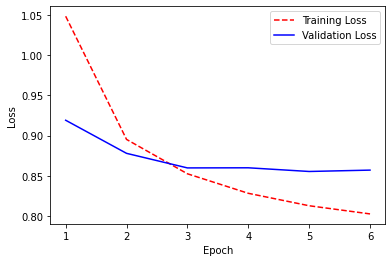

In [0]:
import matplotlib.pyplot as plt

# Create count of the number of epochs
epoch_count = range(1, len(history.history['loss']) + 1)

# Visualize learning curve. Here learning curve is not ideal. It should be much smoother as it decreases.
#As mentioned before, altering different hyper parameters especially learning rate can have a positive impact
#on accuracy and learning curve.
plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()